In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D

In [2]:
path = Path(r"C:\DATASCIENCE\RonyProject\NullClass\Age Detection on IMDB-WIKI\UTKFace")
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [3]:
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


In [4]:
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels, image_path = [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [5]:
image_path

['23_1_2_20170116172910708.jpg.chip.jpg',
 '28_0_1_20170113150719161.jpg.chip.jpg',
 '26_1_0_20170116234741431.jpg.chip.jpg',
 '37_0_3_20170119202516470.jpg.chip.jpg',
 '60_0_0_20170109013457906.jpg.chip.jpg',
 '2_0_2_20161219162359990.jpg.chip.jpg',
 '8_0_0_20170110222913531.jpg.chip.jpg',
 '34_1_4_20170113011428472.jpg.chip.jpg',
 '48_1_0_20170109220544479.jpg.chip.jpg',
 '54_0_0_20170113210319475.jpg.chip.jpg',
 '63_0_0_20170113210318902.jpg.chip.jpg',
 '35_1_1_20170113001239705.jpg.chip.jpg',
 '9_1_0_20170109202813775.jpg.chip.jpg',
 '29_1_1_20170116171830504.jpg.chip.jpg',
 '56_1_0_20170103180406295.jpg.chip.jpg',
 '35_0_3_20170119201257884.jpg.chip.jpg',
 '5_0_0_20170109193414770.jpg.chip.jpg',
 '1_0_2_20161219203256078.jpg.chip.jpg',
 '14_0_3_20170104225721488.jpg.chip.jpg',
 '27_0_0_20170113210319553.jpg.chip.jpg',
 '61_1_0_20170117192059259.jpg.chip.jpg',
 '27_0_0_20170117175751139.jpg.chip.jpg',
 '34_0_4_20170105161411273.jpg.chip.jpg',
 '35_0_0_20170117204518056.jpg.chip.jpg

In [6]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [7]:
df.head()

,image,age,gender
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0


In [8]:
gender_dict = {0:"Male",1:"Female"}

In [9]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [10]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


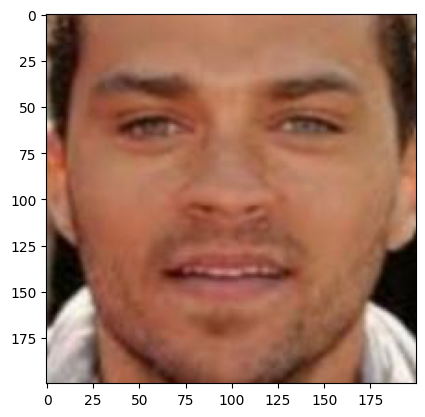

In [11]:
img = Image.open(r"C:\DATASCIENCE\RonyProject\NullClass\Age Detection on IMDB-WIKI\UTKFace/"+df.image[1])
plt.imshow(img)

C:\Users\Rony\AppData\Local\Temp\ipykernel_2736\2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

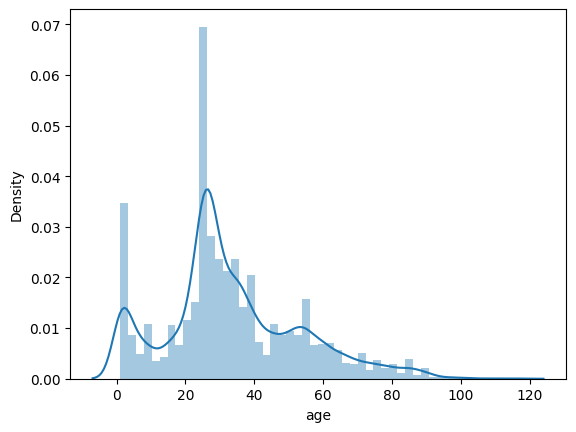

In [12]:
sns.distplot(df.age)

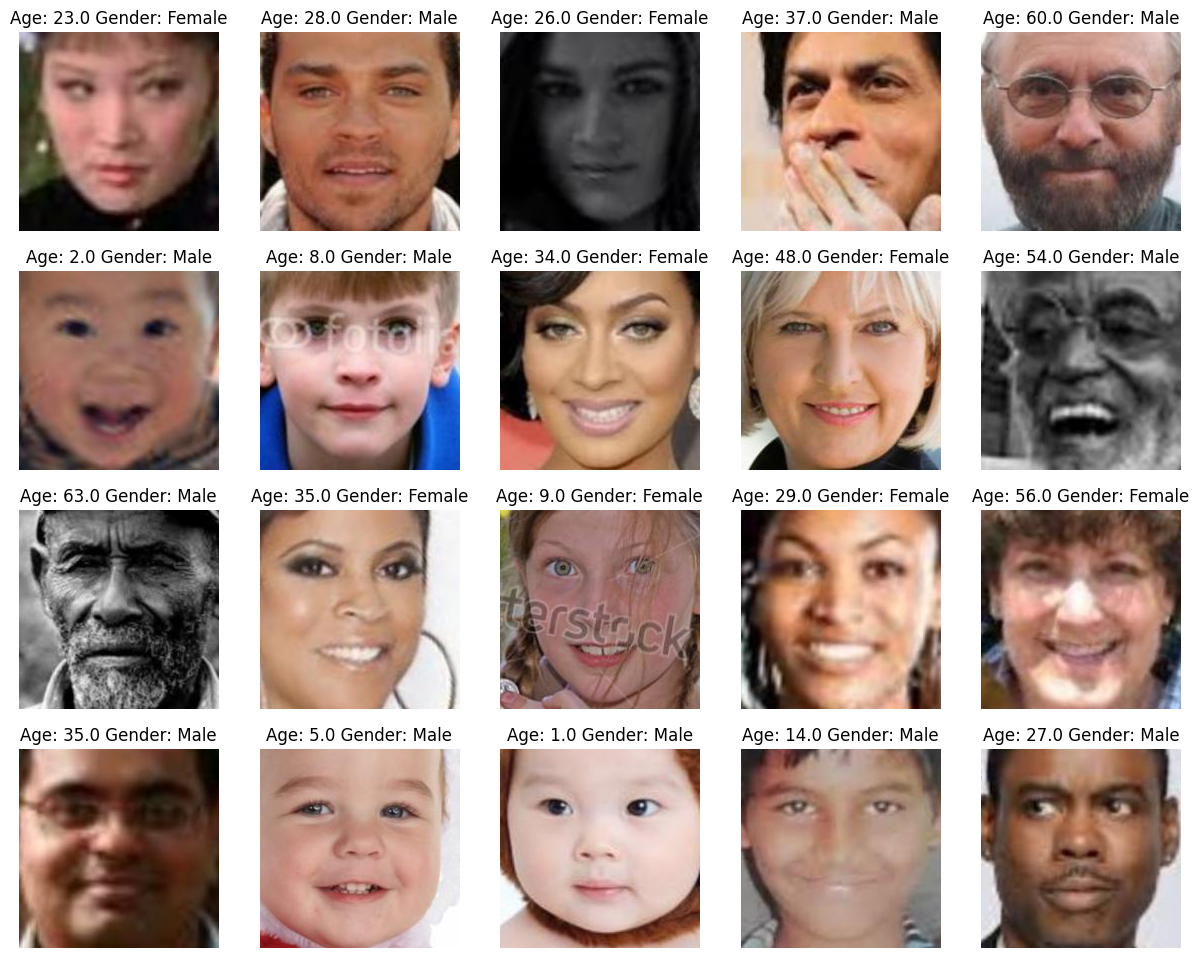

In [13]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img(r"C:\DATASCIENCE\RonyProject\NullClass\Age Detection on IMDB-WIKI\UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [14]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [15]:
train.head()

,image,age,gender
18199,78_1_1_20170113011857601.jpg.chip.jpg,78.0,1
19557,24_0_2_20170103223924087.jpg.chip.jpg,24.0,0
20132,34_1_3_20170119152405425.jpg.chip.jpg,34.0,1
11849,46_0_3_20170119183135878.jpg.chip.jpg,46.0,0
2100,30_0_2_20170116174814595.jpg.chip.jpg,30.0,0


In [16]:
x_train = []
for file in train.image:
    img = load_img(rf"C:\DATASCIENCE\RonyProject\NullClass\Age Detection on IMDB-WIKI\UTKFace/{file}")  # Load image
    img = img.resize((128, 128))  # No need for Image.ANTIALIAS
    img = np.array(img.convert('L'))  # Convert to grayscale
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128, 128, 1) 


In [17]:
x_train.shape

(3556, 128, 128, 1)

In [18]:
x_train = x_train/255

In [19]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [20]:
input_size = (128,128,1)

In [21]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [22]:
model.compile(optimizer='adam', loss=['binary_crossentropy', 'mse'], metrics=[['accuracy'], ['mae']])

In [23]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 126, 126,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 126, 126,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 42, 42,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 40, 40,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 20, 20,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 18, 18,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 9, 9, 256) │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 20736)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │  5,308,672 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  5,308,672 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │        257 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,020,546 (42.04 MB)

 Trainable params: 11,020,418 (42.04 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model_history = model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20


c:\Users\Rony\anaconda3\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(10, 128, 128, 1))
  warnings.warn(msg)


320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - age_output_loss: 594.6462 - age_output_mae: 18.4202 - gender_output_accuracy: 0.6066 - gender_output_loss: 1.0594 - loss: 595.7057

c:\Users\Rony\anaconda3\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 1))
  warnings.warn(msg)


320/320 ━━━━━━━━━━━━━━━━━━━━ 145s 446ms/step - age_output_loss: 594.1086 - age_output_mae: 18.4115 - gender_output_accuracy: 0.6067 - gender_output_loss: 1.0584 - loss: 595.1671 - val_age_output_loss: 614.8187 - val_age_output_mae: 19.5698 - val_gender_output_accuracy: 0.7022 - val_gender_output_loss: 0.6203 - val_loss: 619.1323
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 131s 410ms/step - age_output_loss: 280.4584 - age_output_mae: 12.8709 - gender_output_accuracy: 0.7251 - gender_output_loss: 0.5348 - loss: 280.9932 - val_age_output_loss: 454.6534 - val_age_output_mae: 17.9646 - val_gender_output_accuracy: 0.6966 - val_gender_output_loss: 0.5577 - val_loss: 456.3189
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 113s 352ms/step - age_output_loss: 201.8269 - age_output_mae: 10.5919 - gender_output_accuracy: 0.7946 - gender_output_loss: 0.4306 - loss: 202.2575 - val_age_output_loss: 156.5425 - val_age_output_mae: 9.5340 - val_gender_output_accuracy: 0.8090 - val_gender_output_loss: 0.4016 - val_l

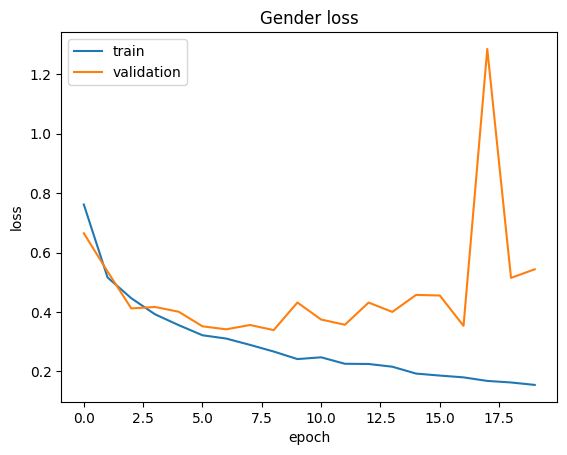

In [ ]:
plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

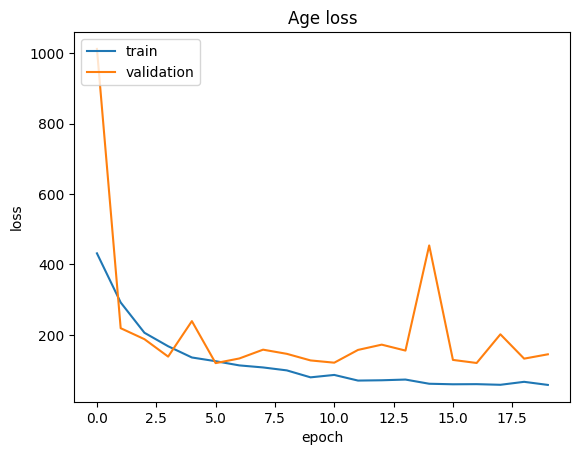

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Original: Gender =  Male  Age =  35.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Prediction: Gender =  Male  Age =  28


c:\Users\Rony\anaconda3\lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 1))
  warnings.warn(msg)


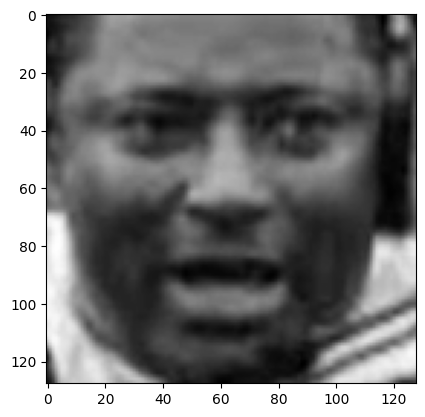

In [ ]:
index=50
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Female  Age =  35.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: Gender =  Female  Age =  46


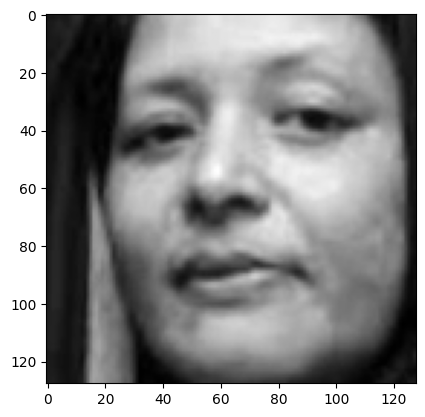

In [ ]:
index=20
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])] 
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')